# keras 安裝

conda install -c conda-forge keras

# theano 安裝

conda install -c conda-forge theano

# tensorflow 安裝

conda install -c jjhelmus tensorflow

### theano , tensorlfow 擇一安裝

## 將keras backend 改為 tensorflow

https://github.com/keras-team/keras/issues/6925

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D,Input
import matplotlib.pylab as plt
import numpy as np
from keras.layers import Convolution2D

C:\Users\diplab\Anaconda3\envs\pytest\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Conv2d example

In [2]:
_input = Input(shape=(3,3,2))
_output = Conv2D(4, kernel_size=(3, 3))(_input)
model = Model(inputs=_input, outputs=_output)

test_input = np.random.random((1,3,3,2))
test_output = model.predict(test_input)
filters_weights = model.weights
print (test_input.shape)
print (test_input)
print (test_output.shape)
print (test_output)
print (filters_weights[0].shape)

(1, 3, 3, 2)
[[[[0.19917424 0.81281581]
   [0.19596894 0.90248866]
   [0.34365737 0.40044349]]

  [[0.76573946 0.9992548 ]
   [0.47782295 0.19339407]
   [0.19129777 0.43298464]]

  [[0.85099491 0.9894876 ]
   [0.51400116 0.07146487]
   [0.41914287 0.04066576]]]]
(1, 1, 1, 4)
[[[[ 0.6175911  -0.5603706  -0.00326664 -0.4765286 ]]]]
(3, 3, 2, 4)


# activation example

In [3]:
_input = Input(shape=(5,))
#_output = Activation('relu')(_input)
#_output = Activation('softmax')(_input)
_output = Activation('sigmoid')(_input)
#_output = Activation('tanh')(_input)
model = Model(inputs=_input, outputs=_output)
test_input = np.random.random((1,5)) * 20 - 10
test_output = model.predict(test_input)

print ('test_input',test_input.shape)
print (test_input)
print ('test_output',test_output.shape)
print (test_output)

test_input (1, 5)
[[ 2.23296247 -1.5147393  -2.04064565  1.44017615  1.19090718]]
test_output (1, 5)
[[0.9031707  0.1802375  0.11500101 0.80848193 0.7669033 ]]


# Flatten example

In [4]:
_input = Input(shape=(3,3,2))
_output = Flatten()(_input)
model = Model(inputs=_input, outputs=_output)
test_input = np.random.random((1,3,3,2))
test_output = model.predict_on_batch(test_input)

print ('test_input',test_input.shape)
print (test_input)
print ('test_output',test_output.shape)
print (test_output)

test_input (1, 3, 3, 2)
[[[[0.24438758 0.57581864]
   [0.72054844 0.46903407]
   [0.92834676 0.93681054]]

  [[0.81040822 0.39329635]
   [0.48365438 0.74293203]
   [0.92184853 0.03206234]]

  [[0.58068433 0.53553023]
   [0.6191085  0.03246089]
   [0.92663597 0.3617067 ]]]]
test_output (1, 18)
[[0.24438758 0.57581866 0.72054845 0.46903408 0.92834675 0.93681055
  0.81040823 0.39329636 0.48365438 0.742932   0.92184854 0.03206234
  0.5806843  0.5355302  0.6191085  0.03246089 0.926636   0.3617067 ]]


# Dense example

In [5]:
from keras import backend as K
_input = Input(shape=(3,))
_output = Dense(5)(_input)
model = Model(inputs=_input, outputs=_output)

test_input = np.random.random((1,3))
test_output = model.predict(test_input)
dense_weights = model.weights
print (test_input.shape)
print (test_input)
print (test_output.shape)
print (test_output)
print (dense_weights[0].shape)


(1, 3)
[[0.1466567  0.85936072 0.64023825]]
(1, 5)
[[ 0.240253    0.470293   -0.24512942  1.1769089  -0.67519367]]
(3, 5)


# keras mnist cnn

In [6]:
batch_size = 32
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


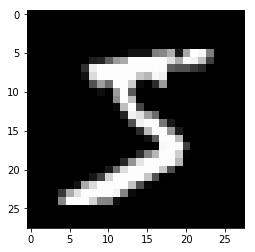

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
num = 0
plt.imshow(x_train[num,:,:,0],'gray')
plt.show()
print (y_train[num])

In [8]:
input_shape = (img_rows, img_cols, 1)
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 8)         296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 8)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               147584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [9]:
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 20s 325us/step - loss: 0.3401 - acc: 0.8964 - val_loss: 0.1040 - val_acc: 0.9669
Epoch 2/3
60000/60000 [==============================] - 19s 323us/step - loss: 0.1563 - acc: 0.9539 - val_loss: 0.0667 - val_acc: 0.9793
Epoch 3/3
60000/60000 [==============================] - 20s 341us/step - loss: 0.1205 - acc: 0.9630 - val_loss: 0.0584 - val_acc: 0.9816
Test loss: 0.058406618024408816
Test accuracy: 0.9816


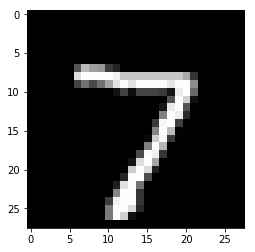

output [6.1301400e-08 5.0388977e-09 1.7181419e-05 1.3681349e-06 5.5480942e-10
 1.5586095e-09 7.6711733e-13 9.9997771e-01 6.0929310e-08 3.5359358e-06]
result [7]


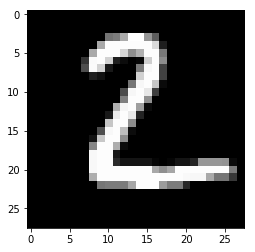

output [5.0472079e-07 3.4966874e-06 9.9999380e-01 7.8357942e-07 2.3452196e-10
 2.0833367e-10 1.0250725e-06 3.7831357e-10 2.8573922e-07 1.3123840e-13]
result [2]


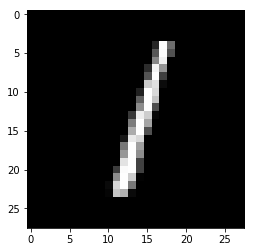

output [1.2695559e-06 9.9954224e-01 4.6887821e-05 4.4764724e-06 7.8214405e-05
 3.6085253e-06 5.7064568e-05 2.0871023e-04 5.5444867e-05 1.9672234e-06]
result [1]


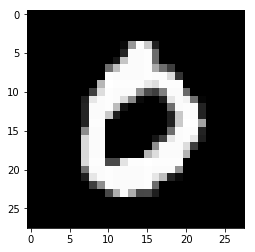

output [9.9973422e-01 4.4691880e-08 4.3940331e-06 2.3549383e-07 1.5687509e-07
 4.7364929e-06 2.3881654e-04 1.0949621e-05 1.6585336e-06 4.7442277e-06]
result [0]


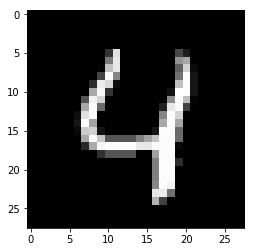

output [3.20774120e-07 1.15453185e-08 4.32192508e-07 1.15367282e-09
 9.99942183e-01 1.14037411e-08 1.86846194e-06 3.42003943e-07
 1.94929484e-07 5.45372714e-05]
result [4]


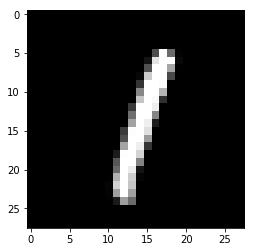

output [3.2447019e-07 9.9967420e-01 1.0926454e-05 1.1443931e-06 4.8773687e-05
 1.2607873e-06 8.8134939e-06 1.9513103e-04 5.7034835e-05 2.2561478e-06]
result [1]


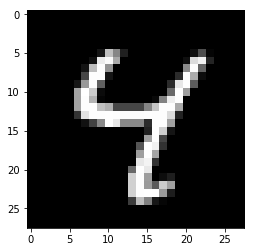

output [1.87513516e-09 7.03983289e-07 1.36446765e-08 2.46058285e-08
 9.99801934e-01 1.26929490e-06 3.48003937e-08 4.44563784e-06
 6.45162363e-05 1.27143692e-04]
result [4]


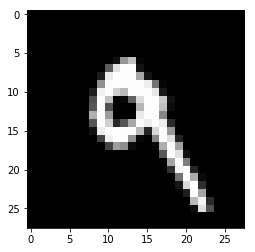

output [3.0748907e-07 5.5351047e-05 1.0169126e-04 2.3581303e-04 1.1954468e-01
 9.7672921e-04 5.0391573e-06 4.2315212e-05 2.3760712e-03 8.7666202e-01]
result [9]


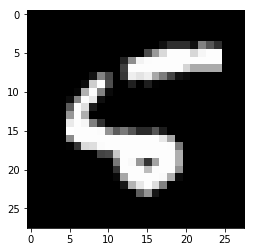

output [6.4903406e-06 1.3900595e-07 5.4752456e-07 1.3590105e-07 2.8946458e-06
 9.3011135e-01 6.9119640e-02 4.9941452e-08 7.0952025e-04 4.9292939e-05]
result [5]


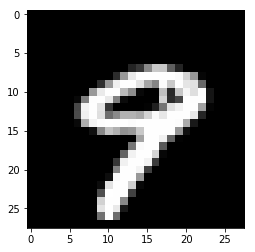

output [4.3509182e-08 4.5128278e-08 6.6818088e-06 7.6360484e-06 1.2111962e-03
 4.6779833e-06 7.3273170e-09 4.8164986e-03 8.6855041e-05 9.9386638e-01]
result [9]


In [10]:
import numpy as np
test_data = x_test[0:10]
test_result=model.predict(test_data)
for i in range (test_result.shape[0]):
    plt.imshow(test_data[i,:,:,0],'gray')
    plt.show()
    print ('output',test_result[i])
    print ('result',np.where(test_result[i]==test_result[i].max())[0])